In [1]:
# Script to download the ERA5 dataset from WeatherBench2. The script filters the data to the Europe grid and the specified date range.

import apache_beam 
import weatherbench2
import xarray as xr
import gcsfs
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [24]:

# Set parameters
era5_path = 'gs://weatherbench2/datasets/era5/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr'
date_range = pd.date_range(f"2010-01-01", f"2022-12-31T18", freq = "6h")
# # Europe grid
lat_range = np.arange(35, 75, 0.25)
lon_range = np.append(np.arange(347.5,360, 0.25),np.arange(0, 42.5,0.25))
variables = ["2m_temperature", "10m_u_component_of_wind", "10m_v_component_of_wind", "temperature", "geopotential", "land_sea_mask", "geopotential_at_surface"]
output_dir = "../era5/"
filename = "era5.nc"
# Create output dir
os.makedirs(output_dir, exist_ok = True)

# Open file from weatherbench and filter
data = xr.open_zarr(era5_path)
data_reduced = data[variables].sel(latitude = lat_range, longitude = lon_range, method = "nearest").sel(time = date_range, method = "nearest")
data_reduced["geopotential"] = data_reduced["geopotential"].sel(level = 500)
data_reduced["temperature"] = data_reduced["temperature"].sel(level = 850)
# Reindex time
#data_reduced["time"] = xr.coding.times.CFDatetimeCoder().encode(data_reduced.time)
# Rechunk and save
data_reduced.chunk("auto")#.to_netcdf(output_dir + filename)


<xarray.Dataset> Size: 13GB
Dimensions:                  (time: 18992, latitude: 160, longitude: 220,
                              level: 13)
Coordinates:
  * latitude                 (latitude) float32 640B 35.0 35.25 ... 74.5 74.75
  * level                    (level) int64 104B 50 100 150 200 ... 850 925 1000
  * longitude                (longitude) float32 880B 347.5 347.8 ... 42.0 42.25
  * time                     (time) datetime64[ns] 152kB 2010-01-01 ... 2022-...
Data variables:
    2m_temperature           (time, latitude, longitude) float32 3GB dask.array<chunksize=(953, 160, 220), meta=np.ndarray>
    10m_u_component_of_wind  (time, latitude, longitude) float32 3GB dask.array<chunksize=(953, 160, 220), meta=np.ndarray>
    10m_v_component_of_wind  (time, latitude, longitude) float32 3GB dask.array<chunksize=(953, 160, 220), meta=np.ndarray>
    temperature              (time, latitude, longitude) float32 3GB dask.array<chunksize=(953, 160, 220), meta=np.ndarray>
    geopotential             (time, latitude, longitude) float32 3GB dask.array<chunksize=(953, 160, 220), meta=np.ndarray>
    land_sea_mask            (latitude, longitude) float32 141kB dask.array<chunksize=(160, 220), meta=np.ndarray>
    geopotential_at_surface  (latitude, longitude) float32 141kB dask.array<chunksize=(160, 220), meta=np.ndarray>

In [83]:
# HRES
ifs_ens_path = 'gs://weatherbench2/datasets/ifs_ens/2018-2022-1440x721_mean.zarr'

date_range = pd.date_range(f"2018-01-01", f"2022-12-31T18", freq = "24h")
variables = ["2m_temperature"]
output_dir = "../era5/"
filename = "ifs_ens.nc"
# Create output dir
#os.makedirs(output_dir, exist_ok = True)

# Open file from weatherbench and filter (6h prediction horizon)
data = xr.open_zarr(ifs_ens_path)
data_reduced = data[variables].sel(latitude = lat_range, longitude = lon_range, method = "nearest").isel(prediction_timedelta = 1)
# Rechunk and save
data_reduced.chunk("auto")#.to_netcdf(output_dir + filename)

/tmp/ipykernel_372007/1349483359.py:12: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  data = xr.open_zarr(ifs_ens_path)


<xarray.Dataset> Size: 514MB
Dimensions:               (time: 3652, latitude: 160, longitude: 220)
Coordinates:
  * latitude              (latitude) float32 640B 35.0 35.25 35.5 ... 74.5 74.75
  * longitude             (longitude) float32 880B 347.5 347.8 ... 42.0 42.25
    prediction_timedelta  timedelta64[ns] 8B 06:00:00
  * time                  (time) datetime64[ns] 29kB 2018-01-01 ... 2022-12-3...
Data variables:
    2m_temperature        (time, latitude, longitude) float32 514MB dask.array<chunksize=(953, 160, 220), meta=np.ndarray>

In [5]:
xr.open_zarr("/home/groups/ai/datasets/weather_forecasting/ifs_ens.zarr", consolidated=False)

/tmp/ipykernel_386385/2062429100.py:1: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr("/home/groups/ai/datasets/weather_forecasting/ifs_ens.zarr", consolidated=False)


<xarray.Dataset> Size: 514MB
Dimensions:               (time: 3652, latitude: 160, longitude: 220)
Coordinates:
    prediction_timedelta  timedelta64[ns] 8B ...
  * latitude              (latitude) float32 640B 35.0 35.25 35.5 ... 74.5 74.75
  * time                  (time) datetime64[ns] 29kB 2018-01-01 ... 2022-12-3...
  * longitude             (longitude) float32 880B 347.5 347.8 ... 42.0 42.25
Data variables:
    2m_temperature        (time, latitude, longitude) float32 514MB dask.array<chunksize=(953, 160, 220), meta=np.ndarray>

# Load finished data

In [26]:
dataset = xr.open_zarr("/home/groups/ai/datasets/weather_forecasting/era5.zarr", consolidated=False)
dataset

<xarray.Dataset> Size: 13GB
Dimensions:                  (time: 18992, latitude: 160, longitude: 220,
                              level: 13)
Coordinates:
  * longitude                (longitude) float32 880B 347.5 347.8 ... 42.0 42.25
  * level                    (level) int64 104B 50 100 150 200 ... 850 925 1000
  * latitude                 (latitude) float32 640B 35.0 35.25 ... 74.5 74.75
  * time                     (time) datetime64[ns] 152kB 2010-01-01 ... 2022-...
Data variables:
    10m_u_component_of_wind  (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 160, 220), meta=np.ndarray>
    temperature              (time, latitude, longitude) float32 3GB dask.array<chunksize=(953, 160, 220), meta=np.ndarray>
    land_sea_mask            (latitude, longitude) float32 141kB dask.array<chunksize=(160, 220), meta=np.ndarray>
    10m_v_component_of_wind  (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 160, 220), meta=np.ndarray>
    2m_temperature           (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 160, 220), meta=np.ndarray>
    geopotential_at_surface  (latitude, longitude) float32 141kB dask.array<chunksize=(160, 220), meta=np.ndarray>
    geopotential             (time, latitude, longitude) float32 3GB dask.array<chunksize=(953, 160, 220), meta=np.ndarray>

## Create global mean and stds statistics

In [27]:
WB_INPUT = ["2m_temperature","temperature", "10m_u_component_of_wind", "10m_v_component_of_wind", "geopotential", "land_sea_mask", "geopotential_at_surface"]

In [28]:
statistics = np.zeros((len(WB_INPUT), 2))
for i,var in enumerate(WB_INPUT):
    if var == "land_sea_mask":
        statistics[i,0] = 0
        statistics[i,1] = 1
    else:
        statistics[i,0] = dataset[var].mean().compute()
        statistics[i,1] = dataset[var].std().compute()

np.save("/home/groups/ai/datasets/weather_forecasting/statistics.npy", statistics)

In [32]:
test = np.load("/home/groups/ai/datasets/weather_forecasting/era5_statistics.npy")

In [33]:
mu, sigma = np.split(test, 2, axis = -1)
mu.shape, sigma.shape

((7, 1), (7, 1))

# OOD

In [18]:
# Resolution
dlat, dlon = 0.25, 0.25
nlat, nlon = 160, 220

# Grid center (around Australia)
lat_center, lon_center =-5, -60

# Latitude grid
lat_start = lat_center - (nlat/2)*dlat
lat_end   = lat_center + (nlat/2)*dlat
lat_range = np.arange(lat_start, lat_end, dlat)

# Longitude grid
lon_start = lon_center - (nlon/2)*dlon
lon_end   = lon_center + (nlon/2)*dlon
lon_range = np.arange(lon_start, lon_end, dlon) +360

In [19]:
# Set parameters
era5_path = 'gs://weatherbench2/datasets/era5/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr'
date_range = pd.date_range(f"2022-12-01", f"2022-12-31T18", freq = "6h")
# # Europe grid
variables = ["2m_temperature", "10m_u_component_of_wind", "10m_v_component_of_wind", "temperature", "geopotential", "land_sea_mask", "geopotential_at_surface"]
filename = "era5_ood.nc"
# Create output dir


# Open file from weatherbench and filter
data = xr.open_zarr(era5_path)
data_reduced = data[variables].sel(latitude = lat_range, longitude = lon_range, method = "nearest").sel(time = date_range, method = "nearest")
data_reduced["geopotential"] = data_reduced["geopotential"].sel(level = 500)
data_reduced["temperature"] = data_reduced["temperature"].sel(level = 850)
# Reindex time
#data_reduced["time"] = xr.coding.times.CFDatetimeCoder().encode(data_reduced.time)
# Rechunk and save
#data_reduced.chunk("auto").to_zarr(path + filename+".zarr", zarr_format = 2, consolidated = False)


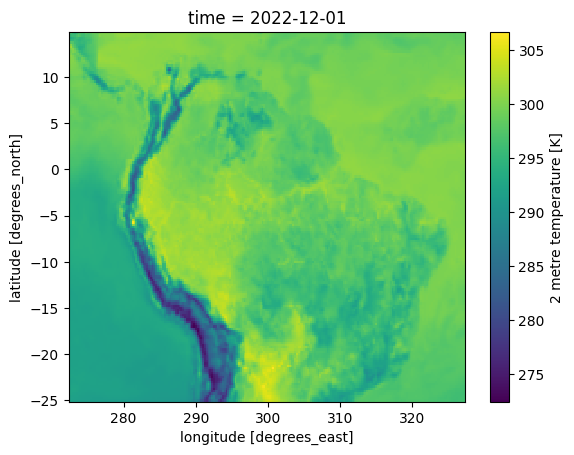

In [20]:
data_reduced["2m_temperature"].isel(time = 0).plot()